- Mạng nơ-ron hồi quy song hướng (BRNN) là một loại Mạng nơ-ron hồi quy (RNN) được thiết kế để cải thiện hiệu suất của RNN truyền thống bằng cách xử lý dữ liệu theo cả hướng thuận và hướng ngược
- Kiến trúc này cho phép mạng có thông tin từ cả bối cảnh quá khứ và tương lai, điều này có thể đặc biệt hữu ích cho các tác vụ mà bối cảnh từ cả hai hướng đều quan trọng, chẳng hạn như xử lý ngôn ngữ, nhận dạng giọng nói và phân tích chuỗi thời gian
### BRNN hoạt động như nào
- Một RNN chuẩn xử lý dữ liệu đầu vào theo trình tự, duy trì trạng thái ẩn được cập nhật ở mỗi bước dựa trên đầu vào hiện tại và trạng thái ẩn trước đó. Tuy nhiên, một RNN chuẩn chỉ sử dụng ngữ cảnh trong quá khứ, điều này có thể là hạn chế đối với một số tác vụ nhất định
- BRNN giải quyết vấn đề này bằng cách có hai trạng thái ẩn riêng biệt: một trạng thái xử lý chuỗi từ đầu đến cuối (hướng về phía trước) và trạng thái còn lại xử lý chuỗi từ cuối đến đầu (hướng về phía sau). Các đầu ra từ hai trạng thái ẩn này sau đó được kết hợp (thường được nối lại) để tạo thành đầu ra cuối cùng
### Kết cấu 
1. RNN forward pass : Xử lý chuỗi đầu vào từ t=1 đến t=T.
2. RNN backward pass : Xử lý chuỗi đầu vào từ t=T đến t=1.
3. Concenation or Adding : Đầu ra từ RNN tiến và lùi được nối tiếp để tạo thành đầu ra cuối cùng tại mỗi bước thời gian hoặc cộng vào với nhau
## Bidirectional RNN architecture

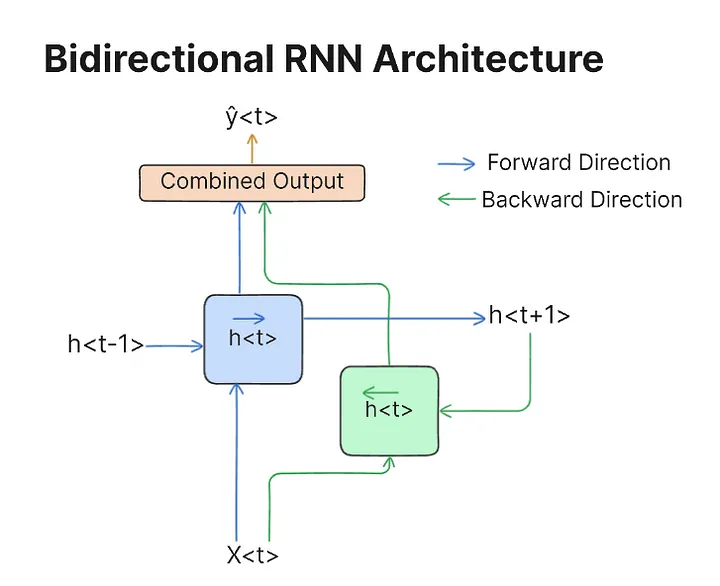

Biểu diễn toán học
Đối với chuỗi đầu vào cho trước X=(x1,x2,…,xT):
**RNN forward pass:**

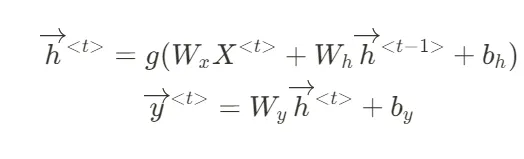

**Ở đây:**

**X<t>:**là đầu vào tại thời điểm bước t
**W_x:** là ma trận trọng số cho đầu vào
**W_h:** là ma trận trọng số cho hidden state từ bước trước
**W_y:** là ma trận trọng số từ hidden state đến đầu ra
**h→<t−1>:** là trạng thái ẩn từ bước thời gian trước đó
**b_h, b_y:** là các bias
**g:** hàm kích hoạt, thường là hàm phi tuyến tính như tanh hoặc ReLU
**y→<t>:** là đầu ra tại thời điểm bước t

**Backward RNN:**

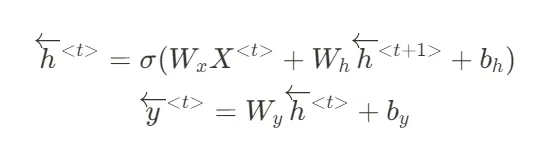

**Ở đây:**

X<t>: là đầu vào tại bước thời gian t (giống như trong RNN chuyển tiếp)
W_x, W_h và b_h là các ma trận và các điều khoản độ lệch giống nhau được sử dụng trong RNN chuyển tiếp nhưng được áp dụng theo thứ tự ngược lại
h←<t+1>: là trạng thái ẩn từ bước thời gian tiếp theo (khi chúng ta đang xử lý ngược lại)
Biến đổi đầu ra tương tự như biến đổi đầu ra của RNN hướng tới

**Combined output:**

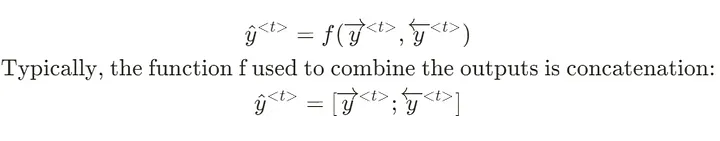

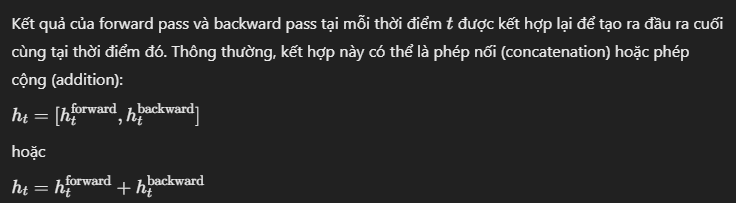

Giả sử kích thước các hidden state là n
- Phép nối giữ nguyên toàn bộ thông tin từ cả forward và backward pass, nhưng yêu cầu nhiều tài nguyên tính toán hơn vì kích thước sẽ là 2n.
- Phép cộng giảm kích thước và tài nguyên tính toán cần thiết, nhưng có thể dẫn đến mất mát một số thông tin vì kích thước chỉ là n.

**Đạo hàm BRNN**

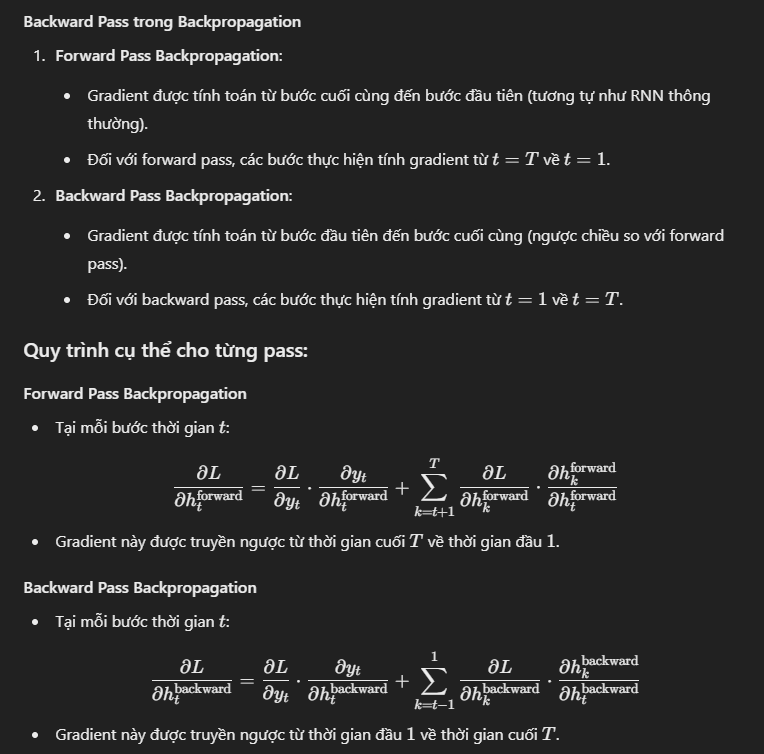

**Dưới đây là kiến trúc BRNN cho t=3**
## Bidirectional RNN Architecture

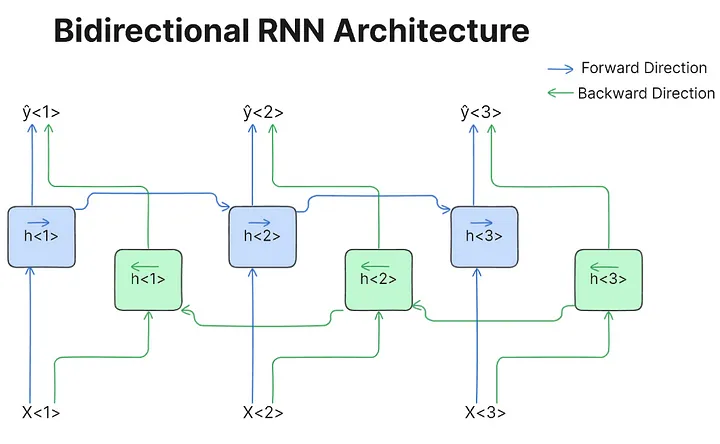
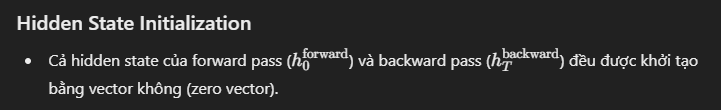

**Dưới đây là kiến trúc Simple RNN cho t=3:**

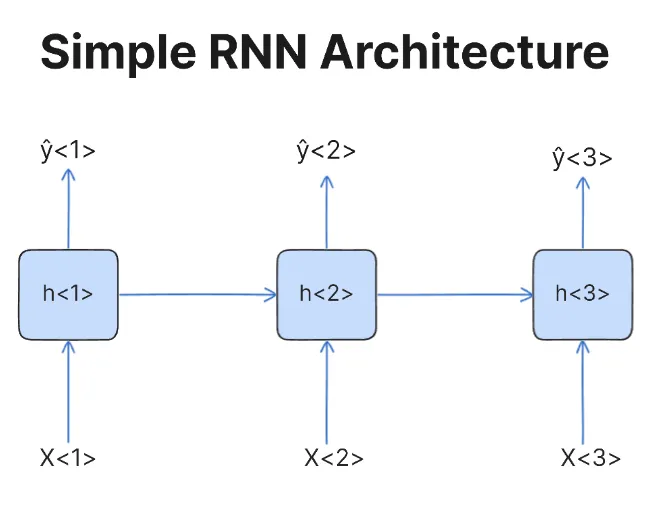

### Mạng nơ-ron hồi quy song hướng (BRNN) có thể được xây dựng bằng cách sử dụng nhiều loại đơn vị hồi quy khác nhau. Các loại được sử dụng phổ biến nhất bao gồm:
1. SimpleRNN hai chiều (BSimpleRNN) :

- Một dạng đơn giản của đơn vị tuần hoàn
- Tính toán đầu ra dưới dạng tổng có trọng số của đầu vào hiện tại và trạng thái ẩn trước đó
- Nó đơn giản, nhưng nó có thể gặp phải vấn đề về độ dốc biến mất, đặc biệt là trong các chuỗi dài
2. Bộ nhớ dài hạn song hướng (BLSTM) :

- Kết hợp các tế bào nhớ để lưu giữ thông tin trong các chuỗi dài
- Các cổng (cổng vào, cổng quên và cổng ra) được sử dụng để điều chỉnh luồng thông tin
- Giải quyết hiệu quả vấn đề độ dốc biến mất, giúp nắm bắt các mối phụ thuộc dài hạn hiệu quả hơn
3. Đơn vị hồi quy cổng hai chiều (BGRU) :

- Tương tự như LSTM nhưng có kiến ​​trúc đơn giản hơn
- Kết hợp các cổng quên và cổng nhập thành một “cổng cập nhật” duy nhất và hợp nhất trạng thái ô và trạng thái ẩn
- Cung cấp hiệu suất tương đương với LSTM trong khi hiệu quả tính toán cao hơn

## Ưu điểm của BRNN
1. Hiểu rõ hơn :

- Tại sao : Họ xem xét dữ liệu từ cả quá khứ và tương lai
- Ví dụ : Khi đọc một câu, biết các từ trước và sau giúp hiểu nghĩa tốt hơn
2. Chính xác hơn :

- Tại sao : Họ xem xét nhiều thông tin hơn, dẫn đến dự đoán tốt hơn
- Ví dụ : Trong các nhiệm vụ như dịch ngôn ngữ hoặc nhận dạng giọng nói, điều này dẫn đến ít lỗi hơn
3. Xử lý sự mơ hồ :

- Tại sao : Họ sử dụng ngữ cảnh từ cả hai hướng để làm rõ sự nhầm lẫn
- Ví dụ : Hiểu xem “chì” ám chỉ kim loại hay hành động dẫn bằng cách xem xét các từ xung quanh
## Nhược điểm của BRNN
1. Tính toán chậm hơn :

- Tại sao : Họ xử lý dữ liệu hai lần, một lần theo chiều xuôi và một lần theo chiều ngược
- Ví dụ : Phải mất nhiều thời gian hơn để đào tạo và chạy trên các tập dữ liệu lớn
2. Sử dụng nhiều bộ nhớ hơn :

- Tại sao : Lưu trữ các trạng thái ẩn theo cả hai hướng sử dụng nhiều bộ nhớ hơn
- Ví dụ : Điều này có thể là vấn đề khi làm việc với chuỗi dài hoặc phần cứng hạn chế
3. Xây dựng phức tạp hơn :

- Tại sao : Họ cần xử lý cẩn thận cả những đường chuyền tới và lui
- Ví dụ : Khó triển khai chính xác hơn so với các mô hình đơn giản hơn
4. Độ trễ theo thời gian thực :

- Tại sao : Họ cần xem toàn bộ chuỗi sự kiện trước khi đưa ra quyết định
- Ví dụ : Không phù hợp với các tác vụ cần phản hồi ngay lập tức, như nhận dạng giọng nói theo thời gian thực